<a href="https://colab.research.google.com/github/KENE508/Hypothesis-Testing-/blob/main/Hypothesis_Testing_with_Churn_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.stats import chi2_contingency
cc_data = pd.read_csv('/content/drive/My Drive/csv_folders/Customer_Churn.csv')
cc_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#1. Question to test:
# Is the churn rate significantly different between male and female customers ?

In [ ]:
#  We will be working with the following hypothesis;
# Null (H₀):Contract type has no effect on churn rate(no difference)
# Alternative (H₁): Contract type does affect churn rate(difference exists)

In [ ]:
# Since we are using a chi square test of independence, we need to create our contigency table
con_table = pd.crosstab(cc_data["Gender"], cc_data["Exited"])
print("Contingency Table:\n", con_table)

Contingency Table:
 Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


In [ ]:
chi2, p, dof, expected = chi2_contingency(con_table)
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected Table:\n", expected)

Chi2 Statistic: 112.91857062096116
p-value: 2.2482100097131755e-26
Degrees of freedom: 1
Expected Table:
 [[3617.5909  925.4091]
 [4345.4091 1111.5909]]


In [ ]:
alpha = 0.05
if p < alpha:
    print("\nResult: Reject H₀ → Gender has a significant impact on churn.")
else:
    print("\nResult: Fail to reject H₀ → No significant difference in churn by gender.")


Result: Reject H₀ → Gender has a significant impact on churn.


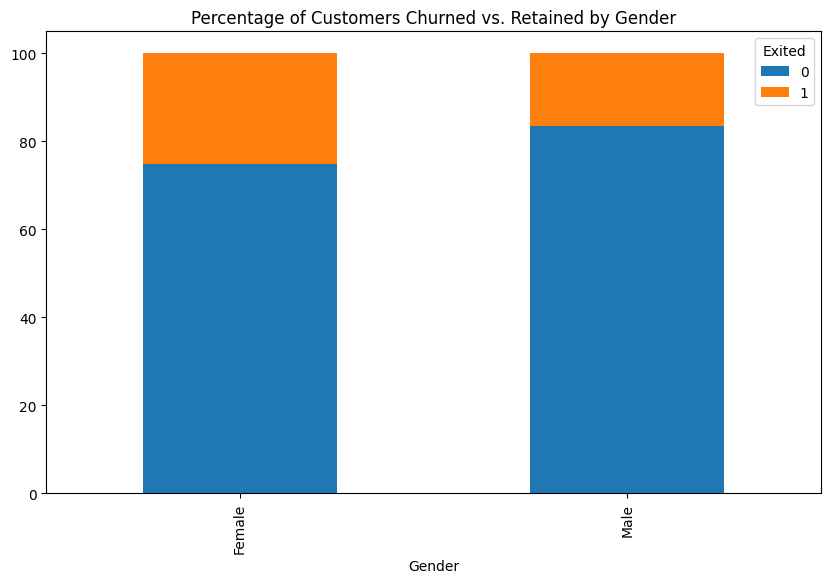

In [ ]:
group_churn = pd.crosstab(cc_data["Gender"], cc_data["Exited"], normalize= "index")*100
group_churn.plot.bar(title ="Percentage of Customers Churned vs. Retained by Gender", stacked="False", figsize=(10, 6));

In [ ]:
#2. Question to test:
#Is the churn rate statistically different between customers of a certain age ?

In [ ]:
# We will be working with the following Hypothesis;
# Null (H₀): Age has no effect on churn rate
# Alternative (H₁): Age has does have an effect on churn rate

In [ ]:
bin_age = pd.cut(cc_data["Age"], bins=[18, 25, 35, 45, 55, 65, 75, 85, 92])
cc_data["bin_age"] = bin_age
# started by grouping this column into bins to get a better range of the values in it

In [ ]:
age_con_table = pd.crosstab(cc_data["bin_age"], cc_data["Exited"])

In [ ]:
chi2, p, dof, expected = chi2_contingency(age_con_table)
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected Table:\n", expected)

Chi2 Statistic: 1375.9517403942073
p-value: 6.163273334992124e-293
Degrees of freedom: 7
Expected Table:
 [[4.68874223e+02 1.20125777e+02]
 [2.81961375e+03 7.22386250e+02]
 [2.97404770e+03 7.61952295e+02]
 [1.04362327e+03 2.67376729e+02]
 [4.26683504e+02 1.09316496e+02]
 [1.74335238e+02 4.46647625e+01]
 [3.34341551e+01 8.56584486e+00]
 [2.38815394e+00 6.11846061e-01]]


In [ ]:
alpha = 0.05
if p < alpha:print("\nResult: Reject H₀ → Age has a significant impact on churn.")
else:
    print("\nResult: Fail to reject H₀ → Age has No significant impact on churn.")



Result: Reject H₀ → Age has a significant impact on churn.


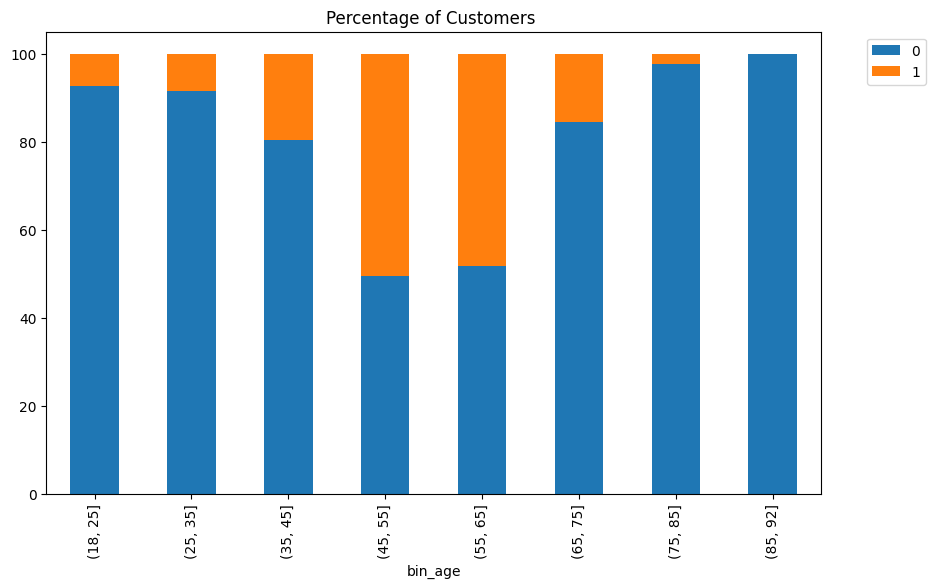

In [ ]:
age_stack = pd.crosstab(cc_data["bin_age"], cc_data["Exited"], normalize= "index")*100
age_stack.plot.bar(title ="Percentage of Customers ", stacked="False", figsize=(10, 6)).legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [ ]:
 #3. Question to test: Is the churn rate different between different geographical locations?

In [ ]:
# We will be working with the following hypothesis;
# Null (H₀): Geography has no effect on churn rate
# Alternative (H₁): Geography has an effect on churn rate

In [ ]:
# First we start with our contigency table
geo_con_table = pd.crosstab(cc_data["Geography"], cc_data["Exited"])
geo_con_table

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [ ]:
chi2, p, dof, expected = chi2_contingency(geo_con_table)
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected Table:\n", expected)

Chi2 Statistic: 301.25533682434536
p-value: 3.8303176053541544e-66
Degrees of freedom: 2
Expected Table:
 [[3992.6482 1021.3518]
 [1997.9167  511.0833]
 [1972.4351  504.5649]]


In [ ]:
alpha = 0.05
if p < alpha:
    print("\nResult: Reject H₀ → Geography has a significant impact on churn.")
else:
    print("\nResult: Fail to reject H₀ → Geography has No significant impact on churn.")


Result: Reject H₀ → Geography has a significant impact on churn.


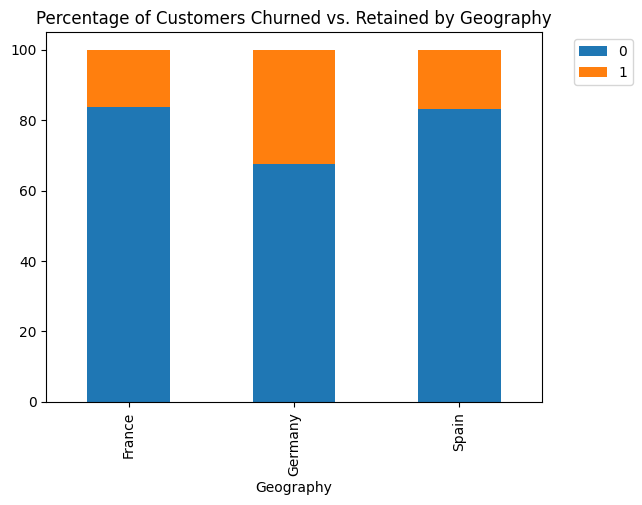

In [ ]:
geo_stack = pd.crosstab(cc_data["Geography"], cc_data["Exited"], normalize= "index")*100
geo_stack.plot.bar(title ="Percentage of Customers Churned vs. Retained by Geography", stacked="False").legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [ ]:
#4. Question to test: Is there a significant impact on rate of churn by active and non active members?

In [ ]:
# we will use the following hypothesis;
# Null (H₀): There is no impact on rate of churn rate by active/non active members
# Alternative (H₁): There is a significant impact on churn rate by active/non active members

In [ ]:
iam_con_table = pd.crosstab(cc_data["IsActiveMember"], cc_data["Exited"])  # contingency table first

In [ ]:
chi2, p, dof, expected = chi2_contingency(iam_con_table)
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected Table:\n", expected)

Chi2 Statistic: 242.98534164287963
p-value: 8.785858269303703e-55
Degrees of freedom: 1
Expected Table:
 [[3861.2587  987.7413]
 [4101.7413 1049.2587]]


In [ ]:
alpha = 0.05
if p < alpha:
    print("\nResult: Reject H₀ → There is a significant impact on churn rate by active/non active members.")
else:
    print("\nResult: Fail to reject H₀ → There is no significant impact on churn rate by active/non active members.")


Result: Reject H₀ → There is a significant impact on churn rate by active/non active members.


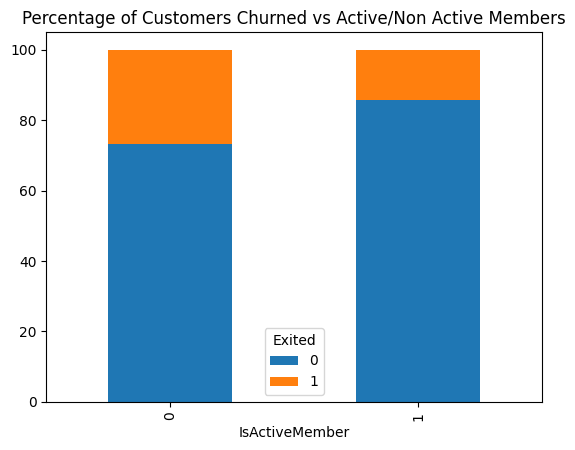

In [ ]:
iam_stacked = pd.crosstab(cc_data["IsActiveMember"], cc_data["Exited"], normalize= "index")*100
iam_stacked.plot.bar(title ="Percentage of Customers Churned vs Active/Non Active Members", stacked="False");

In [ ]:
iam_stacked

Exited,0,1
IsActiveMember,,
0,73.149103,26.850897
1,85.730926,14.269074
